In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os

In [ ]:
drive.mount('/content/drive')
datadir = "/content/drive/My Drive/IE434_ProjectGroup7/Data_JC_2022"
os.chdir(datadir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data Importing**

In [ ]:
#creating a master dataframe to store data from 2017 through 2023
master=pd.DataFrame()
for i, file_name in enumerate(os.listdir()):
  if file_name.endswith(".csv"):
    temp = pd.read_csv(file_name)
    master = pd.concat([master, temp], axis=0, ignore_index=True)

In [ ]:
pwd='/content/drive/My Drive/IE434_ProjectGroup7/Data_JC_2022/New_Forrmat'
os.chdir(pwd)
master2=pd.DataFrame()
for i, file_name in enumerate(os.listdir()):
  if file_name.endswith(".csv"):
    temp = pd.read_csv(file_name)
    master2 = pd.concat([master2, temp], axis=0, ignore_index=True)

In [ ]:
pwd='/content/drive/My Drive/IE434_ProjectGroup7/Data_JC_2022/New_Forrmat/New'
os.chdir(pwd)
master3=pd.DataFrame()
for i, file_name in enumerate(os.listdir()):
  #print(file_name)
  if file_name.endswith(".csv"):
    temp = pd.read_csv(file_name)
    master3 = pd.concat([master3, temp], axis=0, ignore_index=True)

In [ ]:
master3.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender'],
      dtype='object')

In [ ]:
master3.rename(columns={'Bike ID': 'ride_id'}, inplace=True)

In [ ]:
master3.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,ride_id,User Type,Birth Year,Gender
0,148,2017-01-01 00:21:32,2017-01-01 00:24:01,3276,Marin Light Rail,40.714584,-74.042817,3185,City Hall,40.717732,-74.043845,24575,Subscriber,1983.0,1
1,1283,2017-01-01 00:24:35,2017-01-01 00:45:58,3183,Exchange Place,40.716247,-74.033459,3198,Heights Elevator,40.748716,-74.040443,24723,Subscriber,1978.0,1
2,372,2017-01-01 00:38:19,2017-01-01 00:44:31,3183,Exchange Place,40.716247,-74.033459,3211,Newark Ave,40.721525,-74.046305,24620,Subscriber,1989.0,1
3,1513,2017-01-01 00:38:37,2017-01-01 01:03:50,3194,McGinley Square,40.725340,-74.067622,3271,Danforth Light Rail,40.692640,-74.088012,24668,Subscriber,1961.0,1
4,639,2017-01-01 01:47:52,2017-01-01 01:58:31,3183,Exchange Place,40.716247,-74.033459,3203,Hamilton Park,40.727596,-74.044247,26167,Subscriber,1993.0,1


These are the column heads and are used for exploratory analysis.

In [ ]:
master2.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [ ]:
master2.rename(columns={'bikeid': 'ride_id'}, inplace=True)

In [ ]:
master2.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,ride_id,usertype,birth year,gender
1363035,2476,2021-01-31 20:16:05.4700,2021-01-31 20:57:22.0110,3187,Warren St,40.721124,-74.038051,3483,Montgomery St,40.719420,-74.050990,44852,Subscriber,1958.0,1
1363036,147,2021-01-31 21:05:05.2090,2021-01-31 21:07:32.8660,3186,Grove St PATH,40.719586,-74.043117,3187,Warren St,40.721124,-74.038051,46538,Subscriber,1972.0,1
1363037,660,2021-01-31 21:06:23.5880,2021-01-31 21:17:23.8420,3211,Newark Ave,40.721525,-74.046305,3276,Marin Light Rail,40.714584,-74.042817,44398,Subscriber,1987.0,2
1363038,384,2021-01-31 21:16:37.8220,2021-01-31 21:23:02.1240,3205,JC Medical Center,40.716540,-74.049638,3268,Lafayette Park,40.713464,-74.062859,41400,Subscriber,1989.0,1
1363039,356,2021-01-31 23:24:50.8810,2021-01-31 23:30:47.3030,3639,Harborside,40.719252,-74.034234,3186,Grove St PATH,40.719586,-74.043117,43766,Subscriber,1994.0,1


In [ ]:
master.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [ ]:
master.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,121DD7DD23CB1335,docked_bike,2021-02-03 23:11:28,2021-02-03 23:18:28,Hoboken Ave at Monmouth St,JC105,Christ Hospital,JC034,40.735208,-74.046964,40.734786,-74.050444,member
1,FD73FB85F008349D,docked_bike,2021-02-27 16:34:05,2021-02-27 16:56:40,Newport Pkwy,JC008,Marin Light Rail,JC013,40.728744,-74.032108,40.714584,-74.042817,member
2,39F9E6663CB5FDF6,docked_bike,2021-02-26 23:16:04,2021-02-26 23:22:25,Journal Square,JC103,Baldwin at Montgomery,JC020,40.733670,-74.062500,40.723659,-74.064194,member
3,A64745CB0792EC6F,docked_bike,2021-02-24 16:51:50,2021-02-24 17:16:09,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,-74.046964,casual
4,75CC76EB9543764A,docked_bike,2021-02-24 20:44:16,2021-02-24 20:44:46,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,-74.046964,member


In [ ]:
#Dropping columns that are not present in all datasets from 2017-2023
master2.drop(columns=['tripduration','birth year', 'gender'],inplace=True)
master3.drop(columns=['Trip Duration','Birth Year', 'Gender'],inplace=True)

In [ ]:
#Setting the order of columns
desired_column_order=['ride_id','starttime', 'stoptime','start station name','start station id', 'end station name','end station id','start station latitude','start station longitude','end station latitude', 'end station longitude','usertype']
desired_column_order2=['ride_id','Start Time', 'Stop Time','Start Station Name','Start Station ID', 'End Station Name','End Station ID','Start Station Latitude','Start Station Longitude','End Station Latitude', 'End Station Longitude','User Type']

In [ ]:
master3=master3[desired_column_order2]
master2=master2[desired_column_order]

In [ ]:
master.drop(columns=['rideable_type'],inplace=True)
#master2.drop(columns='bikeid',inplace=True)
#master3.drop(columns='Bike ID',inplace=True)

In [ ]:
master2.columns=master.columns
master3.columns=master.columns

In [ ]:
#Merging all the data into a single dataframe
bike_data=pd.concat([master,master2,master3],axis=0)
bike_data['started_at']=pd.to_datetime(bike_data['started_at'])
bike_data['ended_at']=pd.to_datetime(bike_data['ended_at'])

In [ ]:
pwd='/content/drive/My Drive/IE434_ProjectGroup7/'
os.chdir(pwd)
bike_data.to_pickle('All_Rides_2017-2023.pkl')

The dataframe has beeen converted to pickle for ease of access.

In [ ]:
df = pd.read_pickle('All_Rides_2017-2023.pkl')
df.head()

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,121DD7DD23CB1335,2021-02-03 23:11:28,2021-02-03 23:18:28,Hoboken Ave at Monmouth St,JC105,Christ Hospital,JC034,40.735208,-74.046964,40.734786,-74.050444,member
1,FD73FB85F008349D,2021-02-27 16:34:05,2021-02-27 16:56:40,Newport Pkwy,JC008,Marin Light Rail,JC013,40.728744,-74.032108,40.714584,-74.042817,member
2,39F9E6663CB5FDF6,2021-02-26 23:16:04,2021-02-26 23:22:25,Journal Square,JC103,Baldwin at Montgomery,JC020,40.733670,-74.062500,40.723659,-74.064194,member
3,A64745CB0792EC6F,2021-02-24 16:51:50,2021-02-24 17:16:09,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,-74.046964,casual
4,75CC76EB9543764A,2021-02-24 20:44:16,2021-02-24 20:44:46,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,-74.046964,member


In [ ]:

df.shape

(3687438, 12)

There are few ride data without start or end station ID and we have dropped them as they indicate loss of data or incomplete ride. They may also indicate theft/vehicle missing.

In [ ]:
#Number of datapoints without start station ID
missing_values = df['start_station_id'].isna().sum()
print(f"Number of missing values in start_station_id: {missing_values}")

Number of missing values in start_station_id: 77


In [ ]:
#Number of datapoints without end station ID
missing_values = df['end_station_id'].isna().sum()
print(f"Number of missing values in end_station_id: {missing_values}")

Number of missing values in end_station_id: 9168


In [ ]:
#Dropping the station id's with missing information
df.dropna(subset=['start_station_id'], inplace=True)
df.dropna(subset=['end_station_id'], inplace=True)

In [ ]:
df.shape

(3678270, 12)

Checking the type of member

In [ ]:
#Different types of members
df['member_casual'].unique()

array(['member', 'casual', 'Subscriber', 'Customer', nan], dtype=object)


The type of member is stored in different format over the years. Here we are changing it to only casual and member

In [ ]:
df['member_casual'] = np.where((df['member_casual'] == 'casual') | (df['member_casual'] == 'Customer'), 'casual', df['member_casual'])
df['member_casual'] = np.where((df['member_casual'] == 'member') | (df['member_casual'] == 'Subscriber'), 'member', df['member_casual'])

Calculating distance between 2 stations and adding a new distance column. This is done to get an attribute to the node. We make the distance as the lenght of the connection of the bike ride.

In [ ]:
#Using haversine distance to calculate distance between start and end station using latitude and longitude
def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c

    return distance

In [ ]:
# Calculate distance for each row
df['distance'] = df.apply(lambda row: haversine_distance(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)

Outliers in distance, are used to find the data points that are beyond the region. Generally such distances are smaller limited to a few miles in the citi network.

In [ ]:
#Identifying outliers in distance - high standard deviation
mean_distance = df['distance'].mean()
std_distance = df['distance'].std()

# Filter values that are more than 3 standard deviations from the mean
large_values = df[df['distance'] > mean_distance + 3 * std_distance]
large_values

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance
112790,29589,2017-09-01 00:15:32.000,2017-09-01 00:22:26.000,Grove St PATH,3186,WS Don't Use,3480,40.719586,-74.043117,0.0,0.0,casual,8670.281780
112899,26249,2017-09-01 07:47:02.000,2017-09-01 07:54:08.000,Leonard Gordon Park,3281,JSQ Don't Use,3215,40.745910,-74.057271,0.0,0.0,member,8671.990798
113019,29596,2017-09-01 08:44:31.000,2017-09-01 08:56:06.000,Oakland Ave,3207,WS Don't Use,3480,40.737604,-74.052478,0.0,0.0,member,8671.424519
113080,26217,2017-09-01 09:17:42.000,2017-09-01 09:30:54.000,Christ Hospital,3212,WS Don't Use,3480,40.734786,-74.050444,0.0,0.0,member,8671.198551
113143,29484,2017-09-01 10:05:21.000,2017-09-01 10:12:48.000,Dixon Mills,3279,WS Don't Use,3480,40.721630,-74.049968,0.0,0.0,member,8670.890976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182811,26163,2017-10-02 12:44:49.000,2017-10-02 12:50:06.000,Marin Light Rail,3276,WS Don't Use,3480,40.714584,-74.042817,0.0,0.0,member,8670.154906
182833,31689,2017-10-02 13:25:34.000,2017-10-02 13:55:36.000,Van Vorst Park,3213,WS Don't Use,3480,40.718489,-74.047727,0.0,0.0,member,8670.641273
1172587,40831,2020-07-17 08:49:47.810,2020-07-17 09:01:33.881,Grove St PATH,3186,Liberty State Park,3475,40.719586,-74.043117,0.0,0.0,member,8670.281780
1176726,44683,2020-07-20 08:53:36.668,2020-07-20 09:02:42.898,Jackson Square,3694,Liberty State Park,3475,40.711130,-74.078900,0.0,0.0,member,8673.074365


Stations with large distance values (large standard deviation)

In [ ]:
# Extract unique end stations from the large_values dataframe
unique_start_stations = large_values['start_station_name'].unique()

# Extract unique end stations from the large_values dataframe
unique_end_stations = large_values['end_station_name'].unique()

print("Start Stations:", unique_start_stations)
print("End Stations:", unique_end_stations)
print("Number of Start Stations:", len(unique_start_stations))
print("Number of End Stations:", len(unique_end_stations))

Start Stations: ['Grove St PATH' 'Leonard Gordon Park' 'Oakland Ave' 'Christ Hospital'
 'Dixon Mills' 'Warren St' 'Newport PATH' 'Essex Light Rail'
 'Van Vorst Park' 'Hilltop' 'Newport Pkwy' 'McGinley Square'
 'Baldwin at Montgomery' 'Exchange Place' 'Pershing Field' 'Sip Ave'
 'Paulus Hook' 'Astor Place' 'Hamilton Park' 'Monmouth and 6th' 'Union St'
 'Columbus Drive' 'York St' 'Lincoln Park' 'Marin Light Rail' 'Newark Ave'
 'Jersey & 3rd' 'Dey St' 'Brunswick & 6th' 'Jersey & 6th St'
 'Manila & 1st' 'Riverview Park' 'Brunswick St' 'City Hall'
 '5 Corners Library' 'Morris Canal' 'Liberty Light Rail'
 'JC Medical Center' 'Heights Elevator' 'Lafayette Park' 'Jackson Square']
End Stations: ["WS Don't Use" "JSQ Don't Use" 'Liberty State Park' 'Indiana']
Number of Start Stations: 41
Number of End Stations: 4


In [ ]:
stations_to_remove = list(unique_start_stations) + list(unique_end_stations)
large_values_df= df[~(df['start_station_name'].isin(stations_to_remove) | df['end_station_name'].isin(stations_to_remove))]

Removing stations: "WS Don't Use", "JSQ Don't Use". They have not beeen used for any analysis and have been dropeed. In the network analysis,they have found as outliers as well which are well beyond the physical network of the network.

In [ ]:
stations_to_remove = ["WS Don't Use", "JSQ Don't Use"]

# Filter out rows where 'start_station_name' or 'end_station_name' is in stations_to_remove
df = df[~df['start_station_name'].isin(stations_to_remove)]
df = df[~df['end_station_name'].isin(stations_to_remove)]

Calculating trip duration using start and end time of the trip. To identify outliers and avergae time on the bikes. To undrestand how users interact with the vehicles and may be useful downstream impact such as charing and hubs for change of vehicles.


Converting all the date and time data to date time form

In [ ]:
df['start_date']=df['started_at'].dt.date
df['end_date']=df['ended_at'].dt.date

In [ ]:
df['start_time']=df['started_at'].dt.time
df['end_time']=df['ended_at'].dt.time

In [ ]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

In [ ]:
#Calculating duration
df['duration'] = ((df['ended_at'] - df['started_at']).dt.total_seconds() / 60).round(2)

In [ ]:
has_negative_values = (df['duration'] < 0).sum()
has_negative_values

79

We can see that the duration of the trip is negative due to wrong entry of start time and end time data. So, we are dropping them.

In [ ]:
df = df[df['duration'] >= 0]

Merging Weather data with the NYC Citi Bike Rentals data. To look at seaonality in data and impact on ridership on weather.

In [ ]:
weather_df = pd.read_pickle('WeatherData_2017-2023.pkl')

In [ ]:
weather_df = weather_df[['DATE','TEMP','VISIB','WDSP','MAX','MIN','PRCP']]

In [ ]:
weather_df

,DATE,TEMP,VISIB,WDSP,MAX,MIN,PRCP
0,2017-01-01,46.1,999.9,7.4,53.6,33.1,0.02
1,2017-01-02,41.2,999.9,8.2,53.1,39.2,0.04
2,2017-01-03,41.7,999.9,15.7,44.6,39.2,0.13
3,2017-01-04,45.6,999.9,8.8,53.6,39.9,0.23
4,2017-01-05,33.8,999.9,12.5,53.1,28.0,0.13
...,...,...,...,...,...,...,...
2148,2023-10-24,58.5,9.8,4.4,66.9,48.9,0.00
2149,2023-10-25,61.6,10.0,6.3,75.0,52.0,0.00
2150,2023-10-26,67.6,10.0,4.8,82.0,53.1,0.00
2151,2023-10-27,66.9,10.0,4.6,82.0,57.9,0.00


In [ ]:
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])
merged_df = pd.merge(df, weather_df, left_on='start_date', right_on='DATE', how='left')

In [ ]:
merged_df.to_pickle("Merged_Data.pkl")

In [ ]:
large_values_df

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance
3,A64745CB0792EC6F,2021-02-24 16:51:50,2021-02-24 17:16:09,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,-74.046964,casual,0.000076
4,75CC76EB9543764A,2021-02-24 20:44:16,2021-02-24 20:44:46,Hoboken Ave at Monmouth St,JC105,Hoboken Ave at Monmouth St,JC105,40.735208,-74.046963,40.735208,-74.046964,member,0.000076
56,CB3A510026E7B39A,2021-02-25 13:27:12,2021-02-25 14:14:54,Harborside,JC104,Hoboken Ave at Monmouth St,JC105,40.719251,-74.034234,40.735208,-74.046964,member,2.073423
99,DB3EAE5325F61F33,2021-02-19 18:12:05,2021-02-19 18:50:14,Bergen Ave,JC095,Bergen Ave,JC095,40.722103,-74.071455,40.722104,-74.071455,member,0.000087
152,0AE0BA28C6EFAA90,2021-02-21 15:52:52,2021-02-21 16:17:45,Hoboken Ave at Monmouth St,JC105,Glenwood Ave,JC094,40.735208,-74.046964,40.727551,-74.071061,member,2.201724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37133,26184,2017-03-27 17:25:49,2017-03-27 17:32:28,Danforth Light Rail,3271,Columbia Park,3216,40.692640,-74.088012,40.697030,-74.096937,member,0.896862
37448,24648,2017-03-28 08:07:46,2017-03-28 08:13:33,Columbia Park,3216,Danforth Light Rail,3271,40.697030,-74.096937,40.692640,-74.088012,member,0.896862
37642,24648,2017-03-28 17:23:11,2017-03-28 17:28:52,Danforth Light Rail,3271,Columbia Park,3216,40.692640,-74.088012,40.697030,-74.096937,member,0.896862
37839,24471,2017-03-29 08:07:34,2017-03-29 08:12:47,Columbia Park,3216,Danforth Light Rail,3271,40.697030,-74.096937,40.692640,-74.088012,member,0.896862


## Visualization of NYC Citi Bike Station Network

In [ ]:
start_station_counts = large_values_df['start_station_name'].value_counts()

valid_start_stations = start_station_counts[start_station_counts > 1].index

end_station_counts = large_values_df['end_station_name'].value_counts()

valid_end_stations = end_station_counts[end_station_counts > 1].index

filtered_df = large_values_df[
    (large_values_df['start_station_name'].isin(valid_start_stations)) &
    (large_values_df['end_station_name'].isin(valid_end_stations))
]

In [ ]:
# Extract unique stations and their coordinates

stations_start = filtered_df[['start_station_id','start_station_name', 'start_lat', 'start_lng']]
stations_end =  filtered_df[['end_station_id', 'end_station_name','end_lat', 'end_lng']]
stations_start.rename(columns={'start_lat': 'Latitude'}, inplace=True)
stations_start.rename(columns={'start_lng': 'Longitude'}, inplace=True)
stations_end.rename(columns={'end_lat': 'Latitude'}, inplace=True)
stations_end.rename(columns={'end_lng': 'Longitude'}, inplace=True)


<ipython-input-77-63d2fd336496>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_start.rename(columns={'start_lat': 'Latitude'}, inplace=True)
<ipython-input-77-63d2fd336496>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_start.rename(columns={'start_lng': 'Longitude'}, inplace=True)
<ipython-input-77-63d2fd336496>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_end.rename(columns={'end_lat': 'Latitude'}, 

In [ ]:
stations_start = stations_start.rename(columns={'start_station_id': 'station_id','start_station_name':'station_name'})
stations_end = stations_end.rename(columns={'end_station_id': 'station_id','end_station_name':'station_name'})

In [ ]:
#Dataframe containing station id's and their latitude and longitude
stations = pd.concat([stations_start, stations_end])

In [ ]:
stations_grouped = stations.groupby(['station_id', 'station_name'])

def get_mode(group):
    return pd.Series(group.mode().iloc[0])

result = stations_grouped.apply(get_mode).reset_index(drop=True)


In [ ]:
import folium
from IPython.display import display

jc_coords = (40.716250, -74.009106)

# Create a Folium map centered at Jersey City
map_centered = folium.Map(location=jc_coords, zoom_start=12)

for station in result.itertuples():
    folium.Marker(
        location=[station.Latitude, station.Longitude],
        popup=f"{station.station_name}",
        icon=folium.Icon(color='blue',icon='bicycle', prefix='fa')
    ).add_to(map_centered)

display(map_centered)

In [ ]:
#Dictionary of positions of each station in NYC
stations.set_index('station_name',inplace=True)
stations["pos"] = list(zip(stations['Latitude'].astype(float), stations['Longitude'].astype(float)))
pos=stations.to_dict()['pos']

In [ ]:
#Creating Graph object
G = nx.from_pandas_edgelist(filtered_df, 'start_station_name', 'end_station_name', edge_attr='distance')

In [ ]:
# Map positions to nodes
for node, position in pos.items():
  try:
    G.nodes[node]['pos'] = position
  except KeyError:
          pass

In [ ]:
len(G.nodes)

269

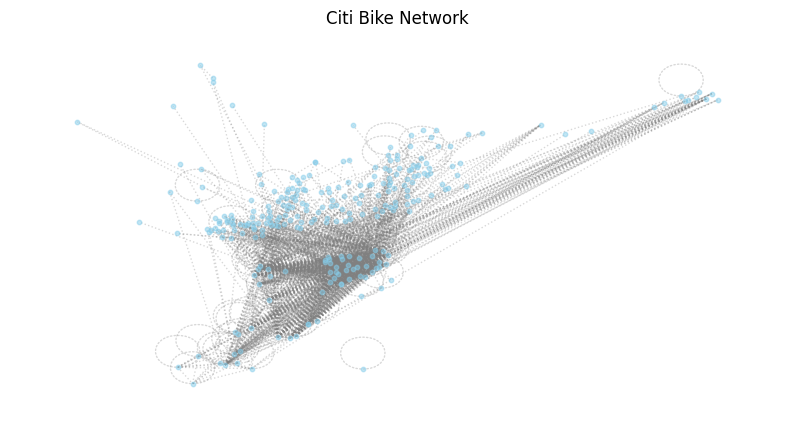

In [ ]:
# Create the graph visualization
fig, ax = plt.subplots(figsize=(10,5))

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos=pos, node_color='skyblue', alpha=0.5, node_size=10)
nx.draw_networkx_edges(G, pos=pos, edge_color='grey', style="dotted", alpha=0.3, arrows=False)
#nx.draw_networkx_labels(G, pos=positions, font_size=12)

# Set the title and turn off the axis
plt.title("Citi Bike Network")
ax.axis('off')

plt.show()


**The** above network shows the connection between any start and end station and distribution of these stations in the citi bike network.

## Centrality metrics of NYC Citi Bike Network

In [ ]:
#Degree Centrality
from operator import itemgetter
degree_mapping = {node: val for node, val in G.degree()}
nx.set_node_attributes(G, degree_mapping, 'degree_value')
sorted_by_degree = sorted(degree_mapping.items(), key=lambda x: x[1], reverse=True)
print("\nNodes with highest degrees:\n")
sorted_by_degree=pd.DataFrame(sorted_by_degree,columns=['Station_Name','Degree'])
sorted_by_degree.head(5)


Nodes with highest degrees:



,Station_Name,Degree
0,Harborside,109
1,14 St Ferry - 14 St & Shipyard Ln,98
2,Grand St,84
3,12 St & Sinatra Dr N,84
4,Washington St,83


**Degree centrality of a station shows the number of neighbors a station has. The above stations with high degree centrality can be considered as hubs or highly connected stations in the network.**

## Centrality analysis, to find the hubs that are demand generators for the network. This may indicate the nature of rides.

In [ ]:
#Closeness Centrality
closeness_dict = nx.closeness_centrality(G)
sorted_closeness = sorted(closeness_dict.items(), key=lambda x: x[1], reverse=True)
print("\nTop 5 nodes by closeness centrality:\n")

sorted_closeness=pd.DataFrame(sorted_closeness,columns=['Station_Name','Closeness'])
sorted_closeness.head(5)


Top 5 nodes by closeness centrality:



,Station_Name,Closeness
0,Harborside,0.607967
1,14 St Ferry - 14 St & Shipyard Ln,0.582297
2,Grand St,0.568403
3,12 St & Sinatra Dr N,0.565947
4,Washington St,0.564728


**Closeness centrality of a station shows how close a station is to all the other stations in the network. The above stations with high closeness centrality act as a central hub that allows for quick travel to other locations.**

In [ ]:
#Betweenness Centrality
betweenness_dict = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness_dict.items(), key=lambda x: x[1], reverse=True)
print("\nTop 5 nodes by betweenness centrality:\n")
sorted_betweenness=pd.DataFrame(sorted_betweenness,columns=['Station_Name','Betweenness'])
sorted_betweenness.head(5)


Top 5 nodes by betweenness centrality:



,Station_Name,Betweenness
0,Harborside,0.188173
1,14 St Ferry - 14 St & Shipyard Ln,0.124864
2,Grand St,0.088152
3,Bergen Ave,0.085875
4,Washington St,0.079340


**Betweenness centrality shows the extent to which a station acts as a bridge between other stations in the network. The above nodes with high betweenness centrality can easily connect the stations that are not directly connected.**

## Start station - End station heatmap for all the years

In [ ]:
def yearly_heatmap(year):
  #data
  df_hmap = merged_df.copy()
  df_hmap['start_date'] = pd.to_datetime(df_hmap['start_date'])
  df_hmap['end_date'] = pd.to_datetime(df_hmap['end_date'])
  filtered_data = df_hmap[df_hmap['start_date'].dt.year == year]
  # Aggregate data based on unique start and end station pairs and count occurrences
  route_frequency = filtered_data.groupby(['start_station_name', 'end_station_name']).size()
  sorted_routes = route_frequency.sort_values(ascending=False)
  # Select the top 20 routes
  top_routes = sorted_routes.head(20).index
  top_stations = set([station for route in top_routes for station in route])

  # Filter the heatmap data to only include the top stations
  heatmap_data = filtered_data[filtered_data['start_station_name'].isin(top_stations) &
                                 filtered_data['end_station_name'].isin(top_stations)]
  heatmap_data = heatmap_data.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')

  # Pivot for heatmap
  heatmap_pivot = heatmap_data.pivot('start_station_name', 'end_station_name', 'count')
  heatmap_pivot = heatmap_pivot.reindex(index=top_stations, columns=top_stations, fill_value=0)

  # Color scale
  min_value = heatmap_pivot.min().min()
  max_value = heatmap_pivot.max().max()

  # Figure
  fig, ax = plt.subplots(figsize=(12, 12))
  sns.heatmap(heatmap_pivot, vmin=min_value, vmax=max_value, cmap="Blues", square=True, annot=True, fmt="d")

  # Labeling
  ax.set_title(f'StartStation - EndStation Heatmap for {year}', fontdict={"fontsize":10}, pad=20)
  ax.set_xlabel("End Station Name", fontsize=10)
  ax.set_ylabel("Start Station Name", fontsize=10)
  plt.show()

<ipython-input-111-e32b89897383>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_pivot = heatmap_data.pivot('start_station_name', 'end_station_name', 'count')


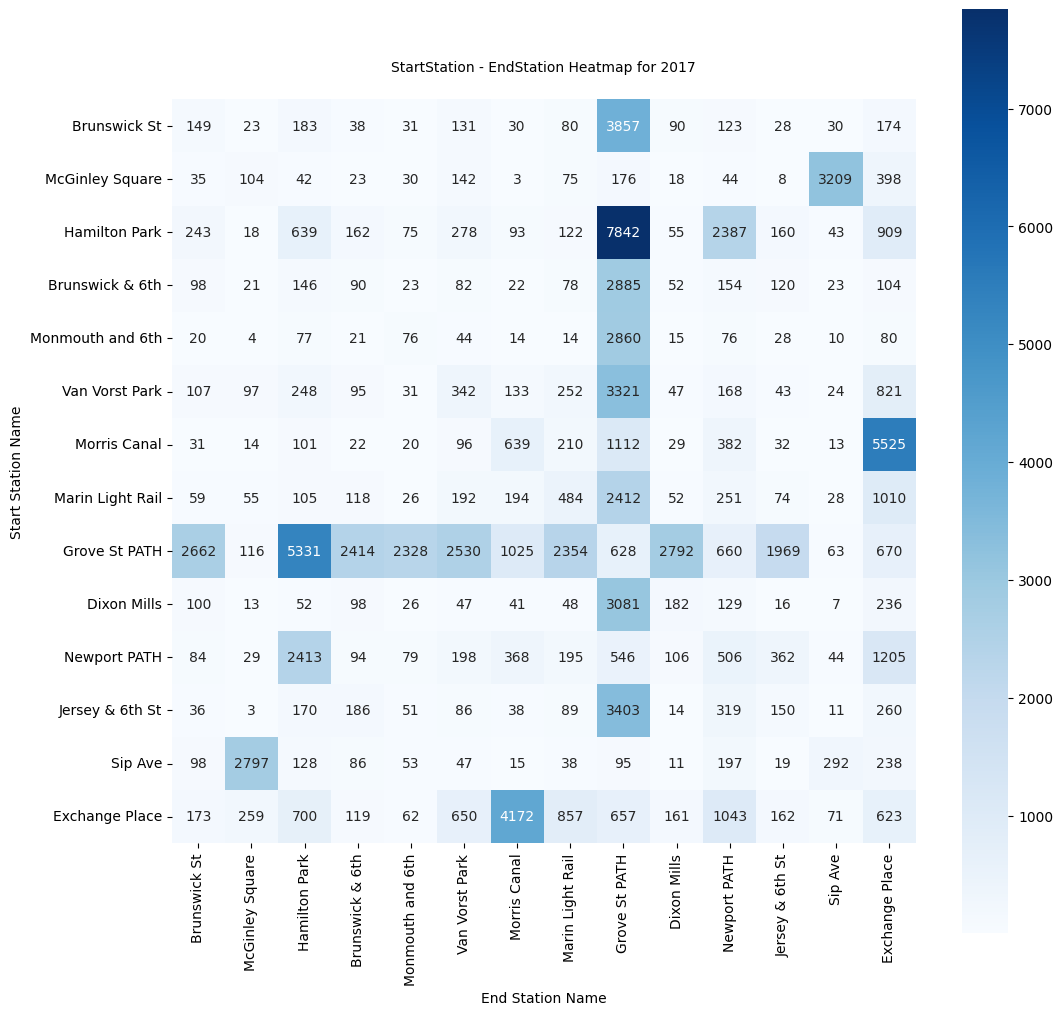

In [ ]:
# heatmap for the year 2017
yearly_heatmap(2017)

**The above figure shows the heatmap which shows the frequency of the rides between the 20 most popular stations. We see that one of the most popular routes starts at Hamilton Park and ends at Grove St PATH station. From this we can gather important information on which stations to place more bikes at the start of the day due to higher demands at those stations.**

## Yearly heatmap of number of trips by Day of the Week and Hour of the Day

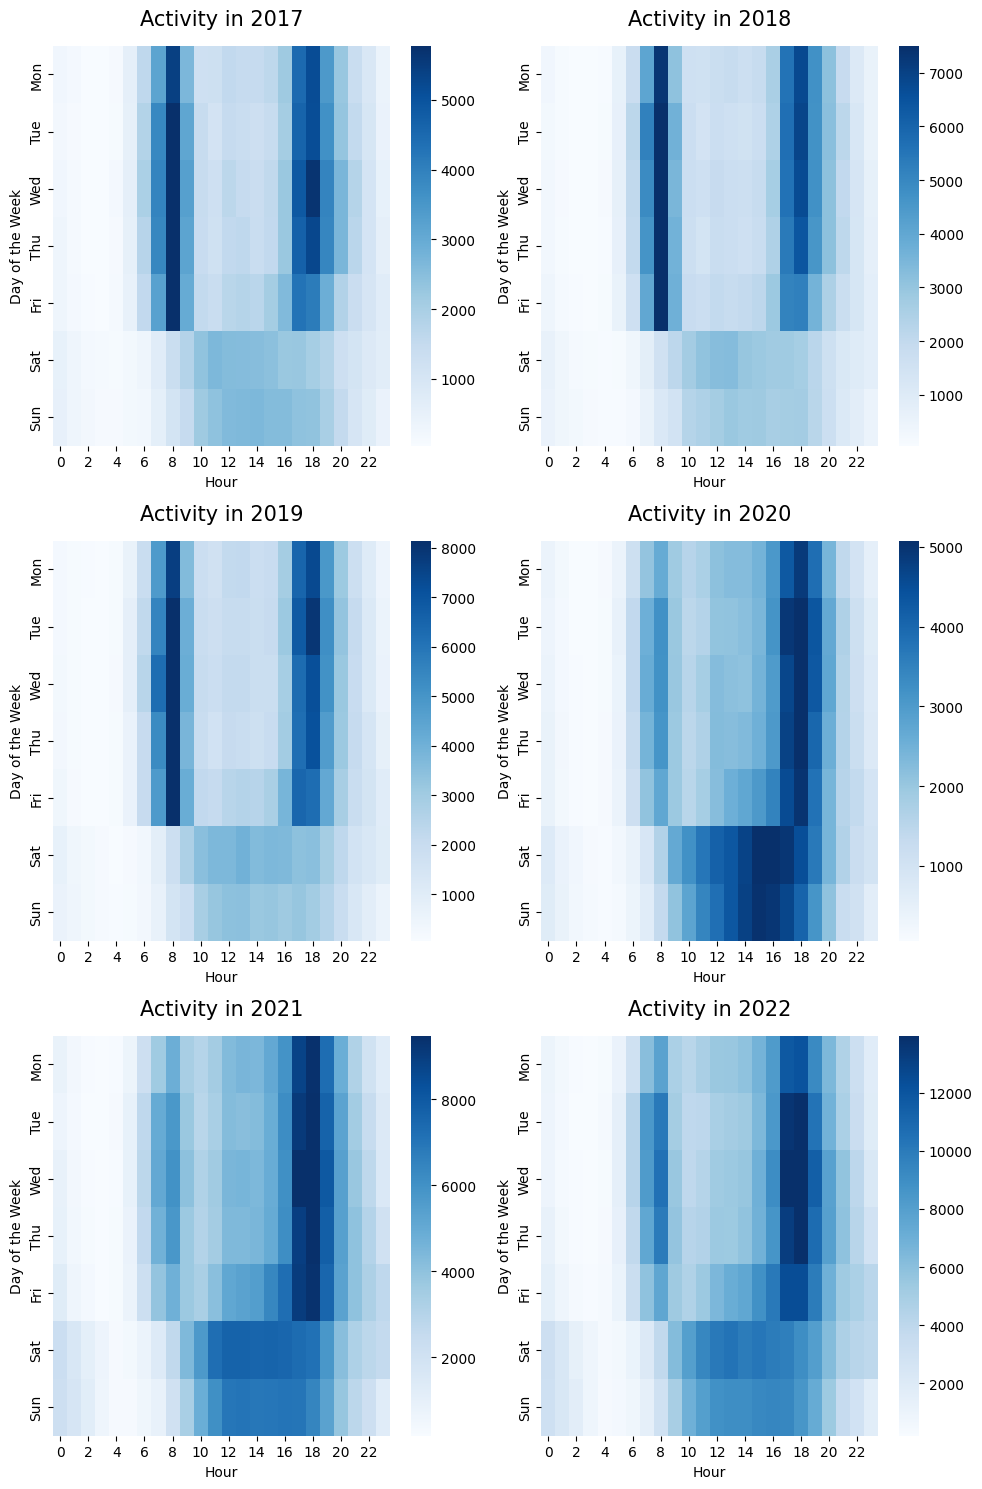

In [ ]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Extract relevant data
df_hmap = merged_df.copy()
df_hmap['start_date'] = pd.to_datetime(df_hmap['start_date'])
#df_hmap['start_time'] = pd.to_datetime(df_hmap['start_time'])
df_hmap['hourly'] = pd.DatetimeIndex(df_hmap['started_at']).hour
df_hmap['day'] = pd.DatetimeIndex(df_hmap['started_at']).weekday
yearly_data = {
    2017: df_hmap[df_hmap['start_date'].dt.year == 2017],
    2018: df_hmap[df_hmap['start_date'].dt.year == 2018],
    2019: df_hmap[df_hmap['start_date'].dt.year == 2019],
    2020: df_hmap[df_hmap['start_date'].dt.year == 2020],
    2021: df_hmap[df_hmap['start_date'].dt.year == 2021],
    2022: df_hmap[df_hmap['start_date'].dt.year == 2022]
}
activity_data = {
    year: yearly_data[year].groupby(by=['day', 'hourly']).count()['start_station_name'].unstack()
    for year in yearly_data
}
# Create visualization
visual, axes = plt.subplots(3, 2, figsize=(10, 15))
# Access each subplot using axes[row, col]
axis1 = axes[0, 0]
axis2 = axes[0, 1]
axis3 = axes[1, 0]
axis4 = axes[1, 1]
axis5 = axes[2, 0]
axis6 = axes[2, 1]
# Plotting data on each axis
sns.heatmap(activity_data[2017], ax=axis1, robust=True, cmap="Blues", yticklabels=days)
sns.heatmap(activity_data[2018], ax=axis2, robust=True, cmap="Blues", yticklabels=days)
sns.heatmap(activity_data[2019], ax=axis3, robust=True, cmap="Blues", yticklabels=days)
sns.heatmap(activity_data[2020], ax=axis4, robust=True, cmap="Blues", yticklabels=days)
sns.heatmap(activity_data[2021], ax=axis5, robust=True, cmap="Blues", yticklabels=days)
sns.heatmap(activity_data[2022], ax=axis6, robust=True, cmap="Blues", yticklabels=days)
# Setting titles and labels
titles = ["Activity in 2017", "Activity in 2018", "Activity in 2019", "Activity in 2020", "Activity in 2021", "Activity in 2022"]
for ax, title in zip([axis1, axis2, axis3, axis4, axis5, axis6], titles):
    ax.set_title(title, fontsize=15, pad=15)
    ax.set(xlabel="Hour", ylabel="Day of the Week")
plt.tight_layout()
plt.show()

**From the above heatmap, we see a trend that repeats in all years that are being analyzed. In particular, we see that on working days, that is from Monday to Friday, the number of rides or activity increases a lot between 7-9 am and 5-7 pm, which makes sense as people might be using bikes to commute to and from their workplace. We also see an increase in activity on weekends in daylight hours from 10 am to around 5-6 pm.**

## Most used Start Stations

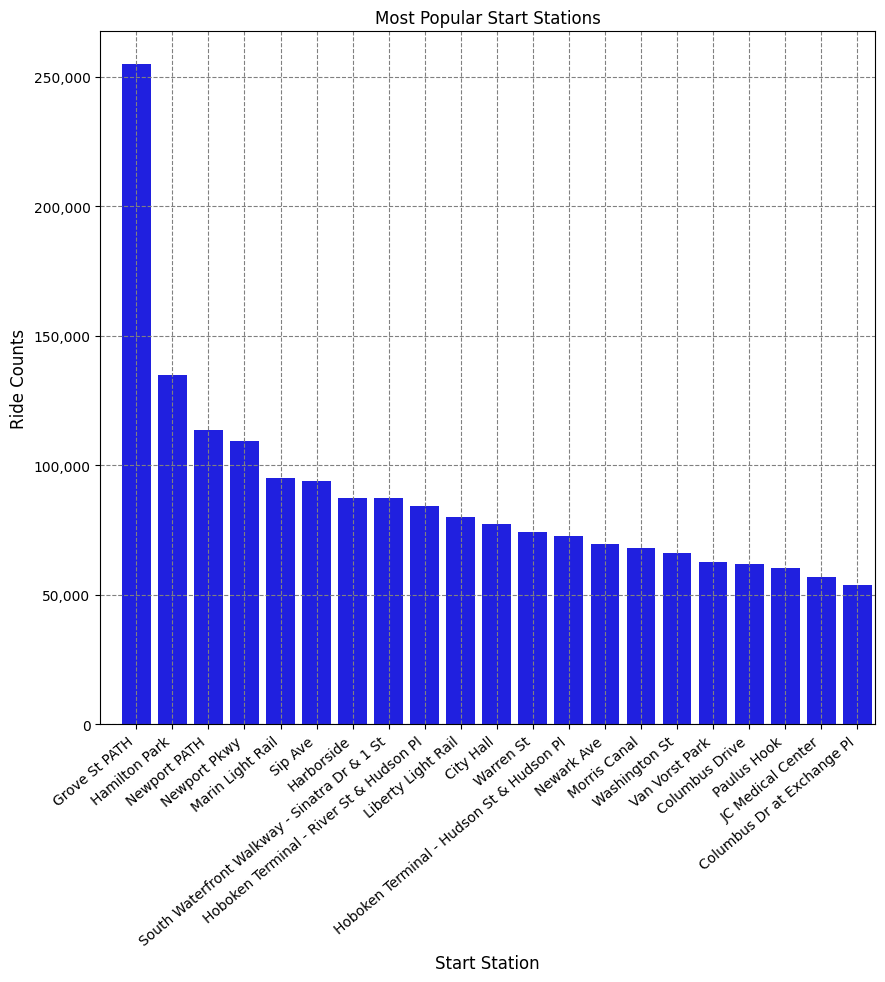

In [ ]:
import matplotlib.ticker as ticker
visual = plt.figure(figsize=(10,9))
plot = sns.countplot(x="start_station_name", color='BLUE', data=merged_df, order=merged_df['start_station_name'].value_counts().index)

plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Start Station", fontsize= 12, x = 0.5)
plt.ylabel("Ride Counts", fontsize= 12)
plt.xlim(-1,20.5)

plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Most Popular Start Stations')
plt.grid(linestyle="--", color='grey')

**In the plot above, we visualize the number of rides that are originating from the top 20 most popular stations to give us a better idea of which stations to place more bikes at the start of each day, as this will follow the same trend if we look at it on a daily basis.**

## Most visited End Stations

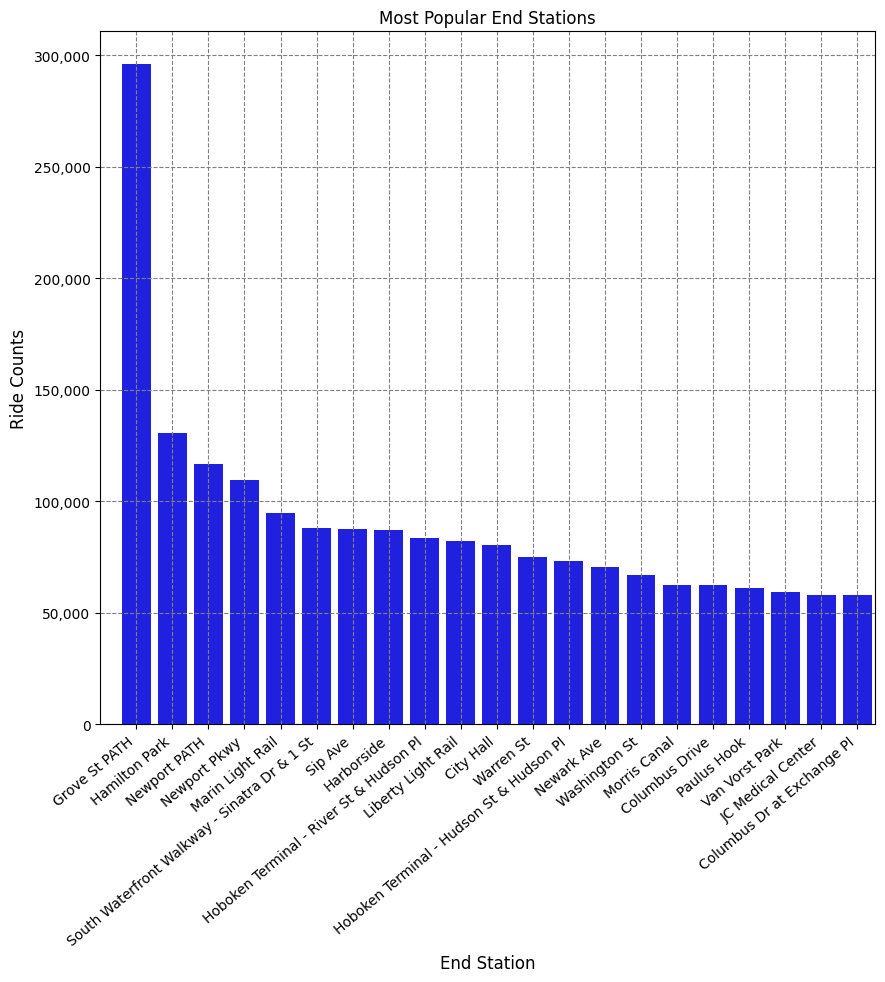

In [ ]:
import matplotlib.ticker as ticker
visual = plt.figure(figsize=(10,9))
plot = sns.countplot(x="end_station_name", color='BLUE', data=merged_df, order=merged_df['end_station_name'].value_counts().index)

# Set axis labels and properties
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("End Station", fontsize= 12, x = 0.5)
plt.ylabel("Ride Counts", fontsize= 12)
plt.xlim(-1,20.5)

plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Most Popular End Stations')
plt.grid(linestyle="--", color='grey')


The above visualization shows the number of rides that end in the top 20 end stations. We can use this information in the case where if an end station is very popular, but we find that the same station does not have many rides originating from there, then we can direct rebalancing vans to move bikes from that end station to more popular start stations so supply meets demand at the popular start stations.

## Number of rides per week over the months from 2017 to 2022



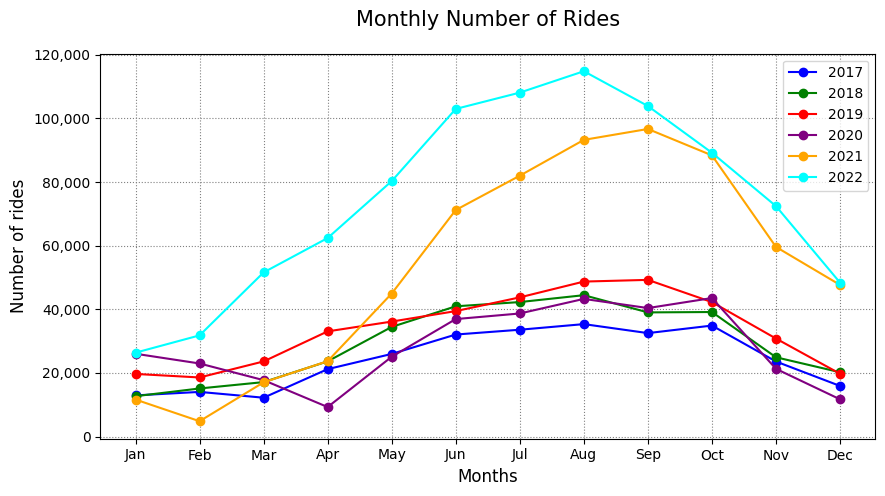

In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

data_copy = merged_df.copy()
data_copy['start_date'] = pd.to_datetime(data_copy['start_date'])


yearly_data = {}
for year in range(2017, 2023):
    yearly_df = data_copy[data_copy['start_date'].dt.year == year].copy()
    #yearly_df = data_copy[data_copy['start_date'].dt.year == year]
    yearly_df.loc[:, 'month'] = yearly_df['start_date'].dt.month
    yearly_data[year] = yearly_df.groupby('month').size().reset_index(name='count')


fig, ax = plt.subplots(figsize=(10,5))

colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']
for year, color in zip(range(2017, 2023), colors):
    plt.plot(yearly_data[year]["month"], yearly_data[year]["count"], color=color, marker='o')


ax.set_title("Monthly Number of Rides", fontsize=15, pad=20)
ax.set_ylabel("Number of rides", fontsize=12)
ax.set_xlabel("Months", fontsize=12)
plt.grid(linestyle=":", color='grey')
plt.legend(["2017", "2018", "2019", "2020", "2021", "2022"])
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()


The graph above shows the number of rides per month for the years 2017-2022. We see a decline in the number of rides in the year 2020, which can be attributed to COVID-19, especially in months of lockdown like in April 2020. We see that the number of rides in the years 2021 and 2022 have gone up by around 2-3x of the 2019 pre COVID era, which indicates that the number of people using the service has increased a lot post COVID.

## Number of rides varying with temperature

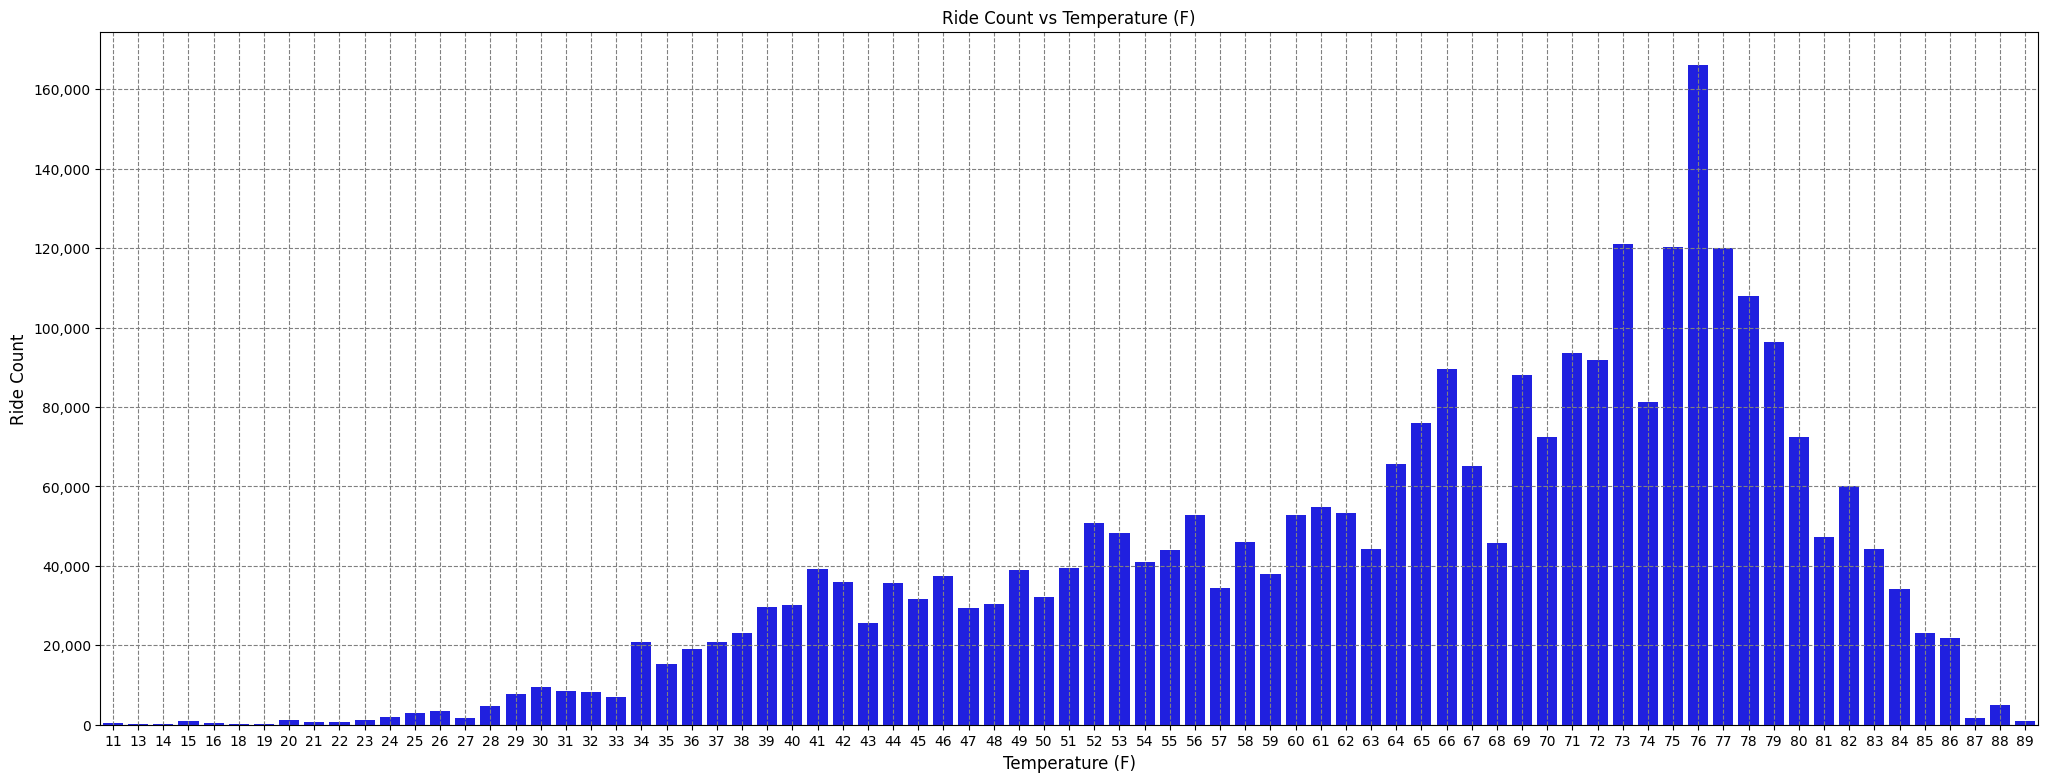

In [ ]:
import matplotlib.ticker as ticker
df_copy = merged_df.copy()
df_copy.dropna(inplace=True)
df_copy["TEMP"] = df_copy["TEMP"].astype(int)

plot_fig, plot_ax = plt.subplots(figsize=(25,9))
plot_ax = sns.countplot(x="TEMP", data=df_copy, color='BLUE')

plot_ax.set_xlabel("Temperature (F)", fontsize=12)
plot_ax.set_ylabel("Ride Count", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plot_ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title ('Ride Count vs Temperature (F)')

plot_ax.grid(linestyle="--", color='gray')

The plot above shows how the number of rides vary with temperature in the region. We see that the there is a linear relation between the number of rides and tempearture. The maximum number of rides take place in the range of 70-80 F and the lowest number of rides at colder temperatures.

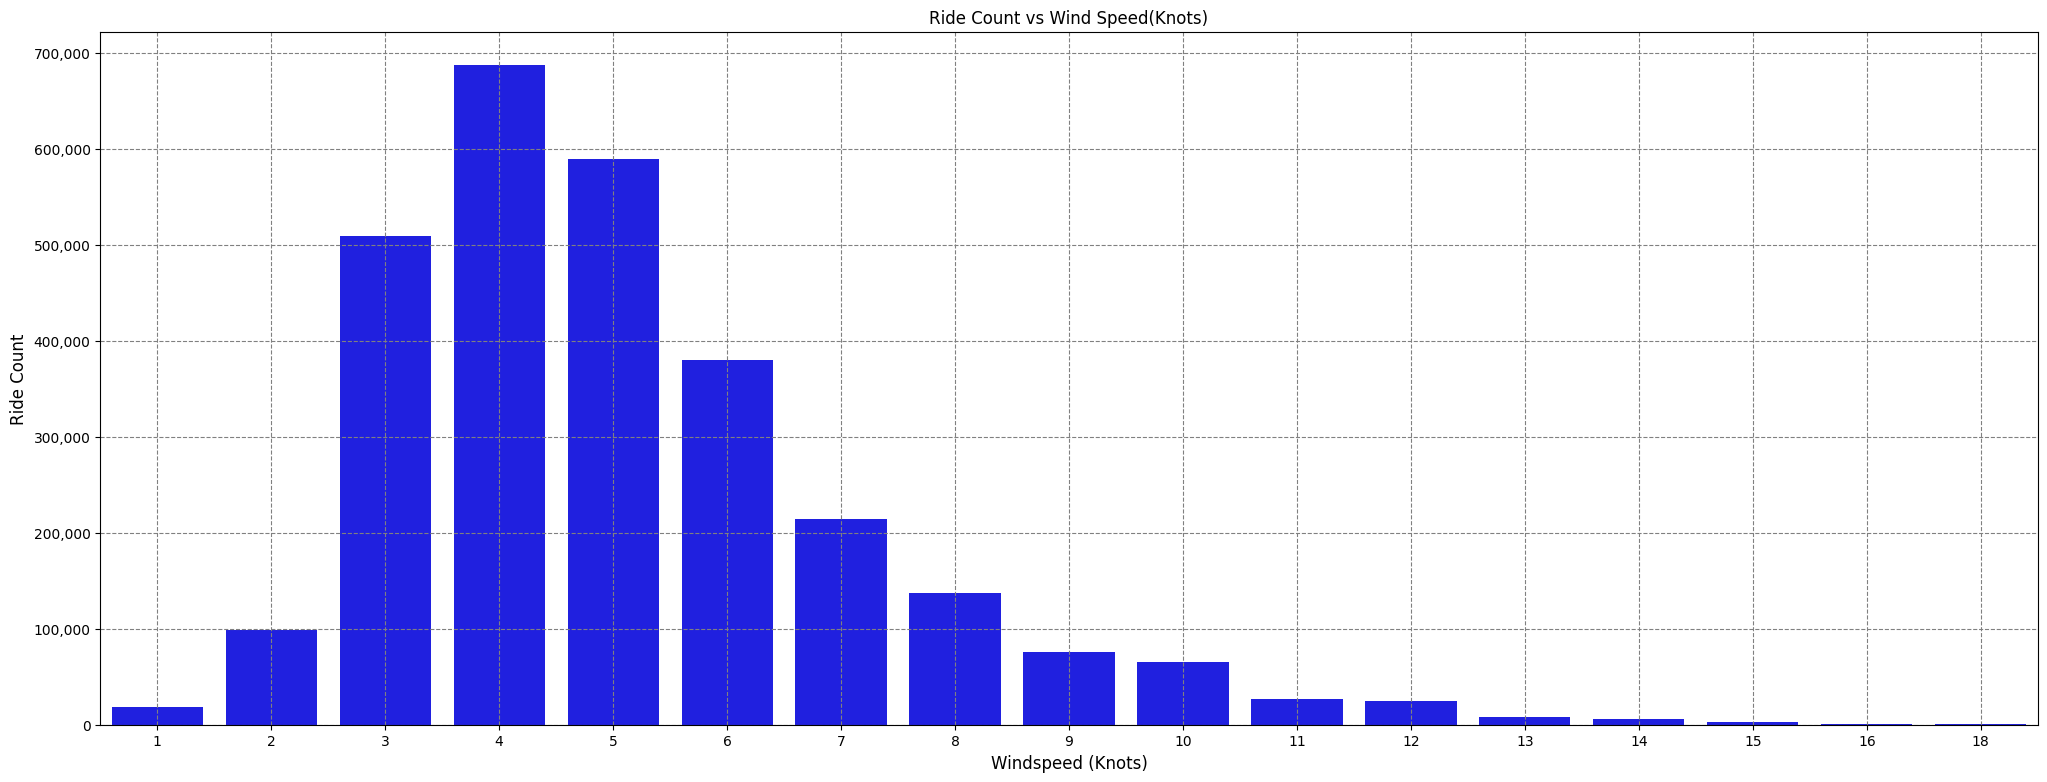

In [ ]:
import matplotlib.ticker as ticker
df_copy = merged_df.copy()
df_copy.dropna(inplace=True)
df_copy["WDSP"] = df_copy["WDSP"].astype(int)

# Remove rows with 'WDSP' equal to 999.9
df_copy = df_copy[df_copy["WDSP"] != 999]

# Visualization
plot_fig, plot_ax = plt.subplots(figsize=(25,9))
plot_ax = sns.countplot(x="WDSP", data=df_copy, color='BLUE')

# Setting axis labels
plot_ax.set_xlabel("Windspeed (Knots)", fontsize=12)
plot_ax.set_ylabel("Ride Count", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plot_ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Ride Count vs Wind Speed(Knots)')

# Adding grid lines
plot_ax.grid(linestyle="--", color='gray')

The above plot shows the relationship between the number of rides and the mean windspeed (knots). We see that number of rides is higher for lower wind speeeds and lower for windier days.

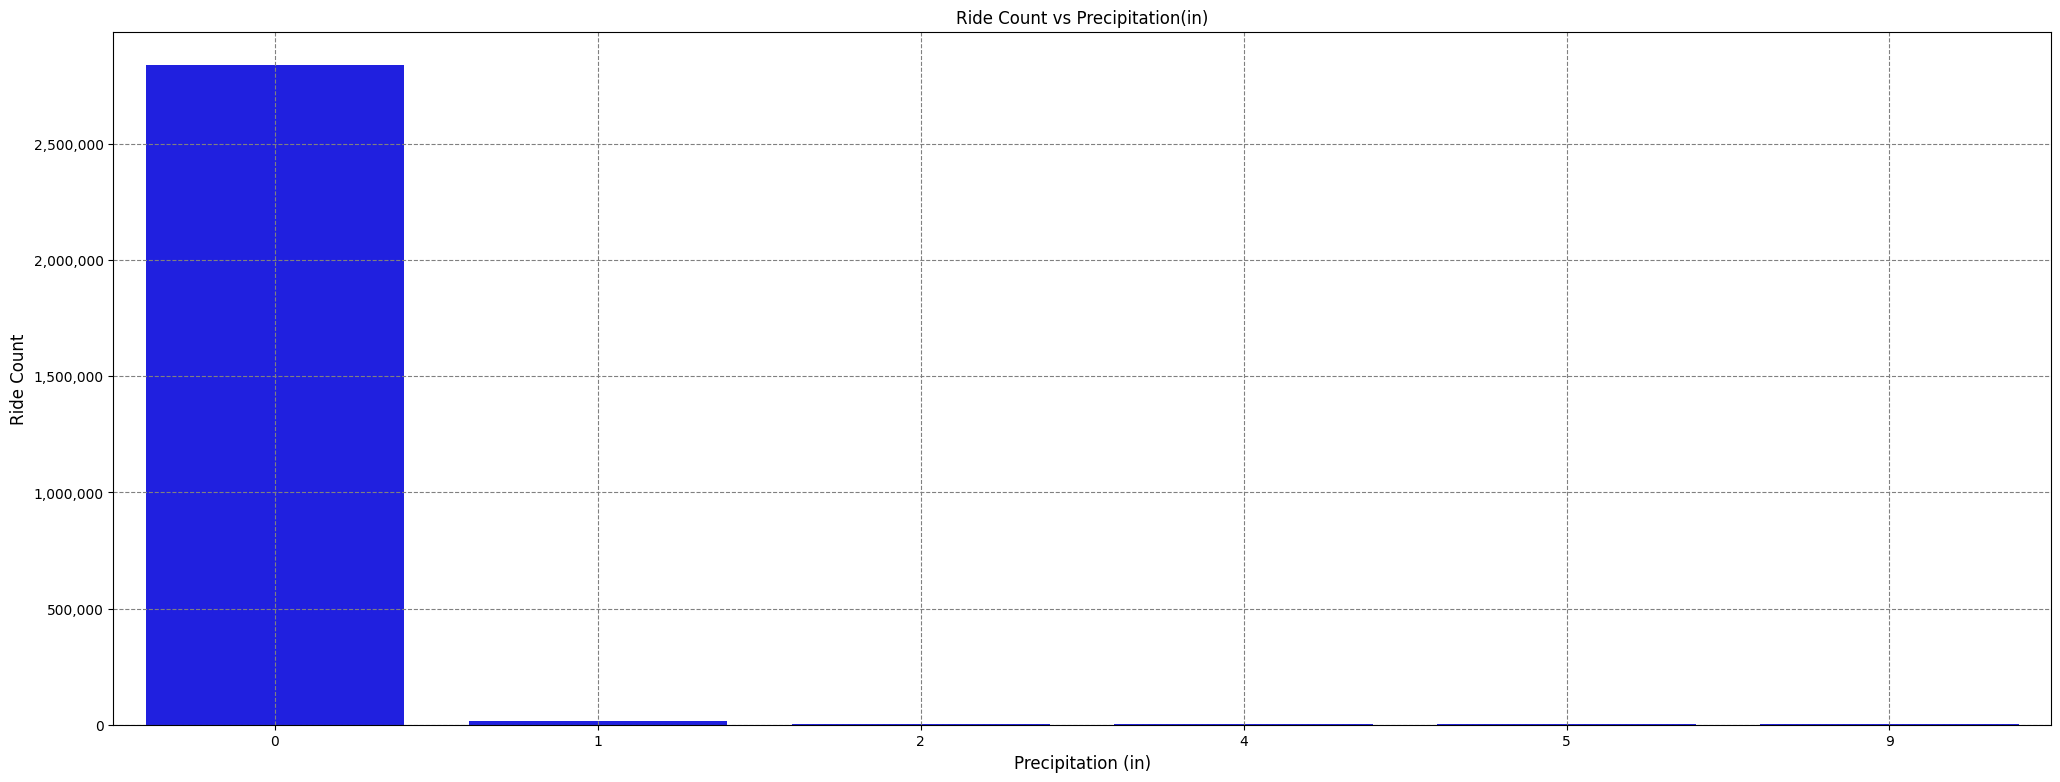

In [ ]:
df_copy = merged_df.copy()
df_copy.dropna(inplace=True)
df_copy["PRCP"] = df_copy["PRCP"].astype(int)

# Remove rows with 'PRCP' equal to 99.99
df_copy = df_copy[df_copy["PRCP"] != 99]

# Visualization
plot_fig, plot_ax = plt.subplots(figsize=(25,9))
plot_ax = sns.countplot(x="PRCP", data=df_copy, color='BLUE')

# Set x-axis limits and intervals
#plt.xlim(-1,30.5)
#plot_ax.set_xticks(range(0, 31))

# Setting axis labels
plot_ax.set_xlabel("Precipitation (in)", fontsize=12)
plot_ax.set_ylabel("Ride Count", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plot_ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Ride Count vs Precipitation(in)')

# Adding grid lines
plot_ax.grid(linestyle="--", color='gray')

**We see from the ride count vs precipiation plot that number of users decreases with increase in precipitation.**

## Number of trips for each day - trend, seasonality and cycles

In [ ]:
#Calculating total number of rides per day across all stations
df_daily = merged_df.copy()
df_c = df_daily.groupby('start_date').size().reset_index(name='count')
df_c['start_date'] = pd.to_datetime(df_c['start_date'])
df_c.head()

,start_date,count
0,2017-01-01,272
1,2017-01-02,144
2,2017-01-03,348
3,2017-01-04,634
4,2017-01-05,552


In [ ]:
df_c["Year"] = pd.DatetimeIndex(df_c["start_date"]).year
df_c["Month"] = pd.DatetimeIndex(df_c["start_date"]).month
df_c["Week"] = pd.DatetimeIndex(df_c["start_date"]).week
df_c["Day"] = pd.DatetimeIndex(df_c["start_date"]).day
df_c["Day of Week"] = pd.DatetimeIndex(df_c["start_date"]).dayofweek
df_c["Day of Year"] = pd.DatetimeIndex(df_c["start_date"]).dayofyear

In [ ]:
df_c.head()

,start_date,count,Year,Month,Week,Day,Day of Week,Day of Year
0,2017-01-01,272,2017,1,52,1,6,1
1,2017-01-02,144,2017,1,1,2,0,2
2,2017-01-03,348,2017,1,1,3,1,3
3,2017-01-04,634,2017,1,1,4,2,4
4,2017-01-05,552,2017,1,1,5,3,5


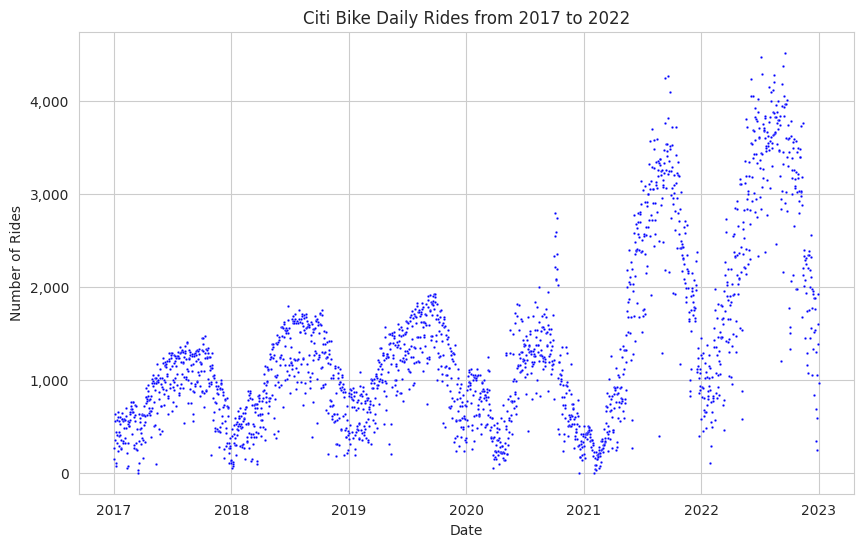

In [ ]:
# Convert 'start_date' to datetime format if it's not already
df_c["start_date"] = pd.to_datetime(df_c["start_date"])

# Filter the dataframe to include only data from 2017 to 2022
filtered_df = df_c[(df_c["start_date"].dt.year >= 2017) & (df_c["start_date"].dt.year <= 2022)]

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data using seaborn's scatterplot function
sns.scatterplot(x=filtered_df["start_date"], y=filtered_df["count"], color="blue", s=3, ax=ax)

# Set the title and axis labels
ax.set_title("Citi Bike Daily Rides from 2017 to 2022")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Rides")

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the plot
plt.show()

**From the above plot, we can see a trend in the overall year on year on growth and the seasonality with peaks in the summer months and valleys in the winter months. This is a clearly cyclicial demand pattern.  With deep valles and high peaks. There is a clearly rising peak demand over the years(evident in the last two years)**

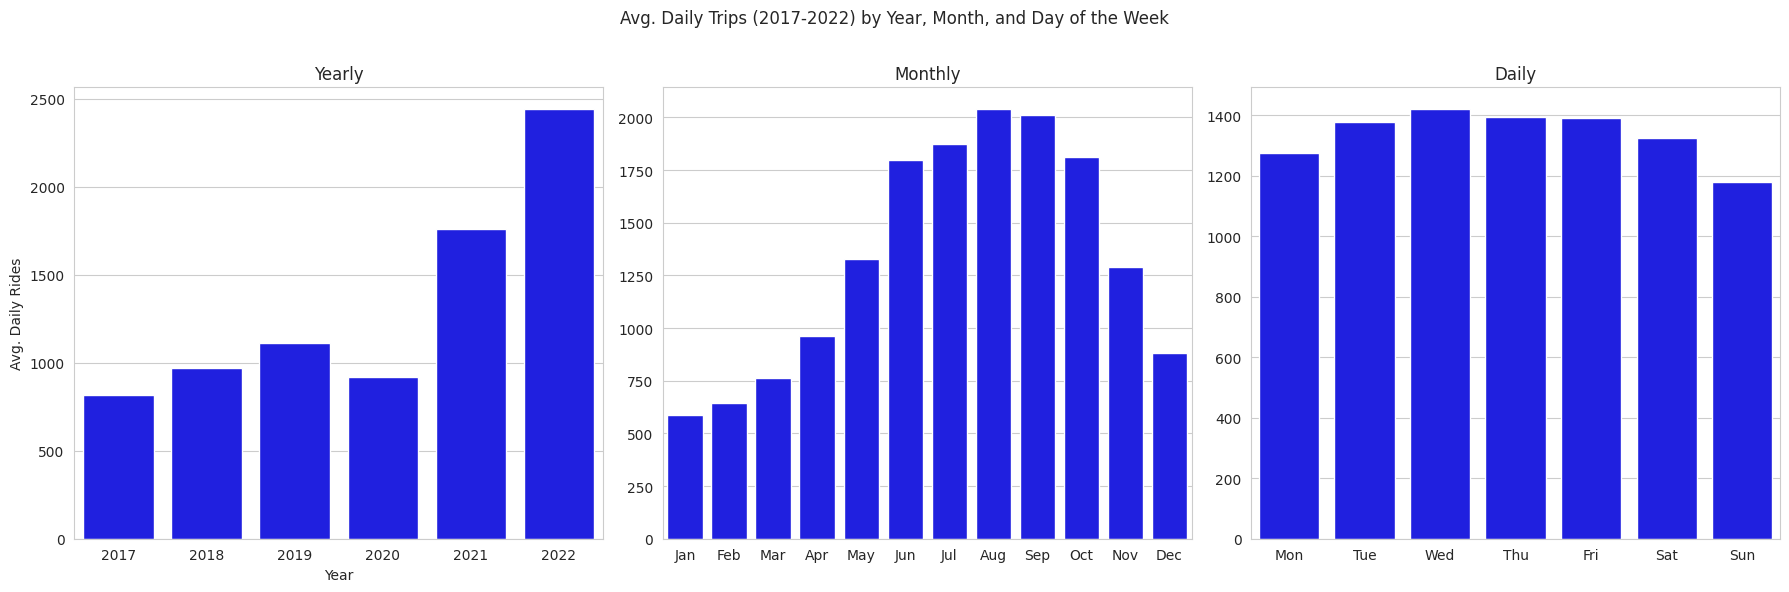

In [ ]:
import calendar
# Filter the data for years 2017-2022
df_c = df_c[df_c["Year"].between(2017, 2022)]

# Group and calculate mean by different time units
annual_avg = df_c.groupby(["Year"]).mean().reset_index()
monthly_avg = df_c.groupby(["Month"]).mean().reset_index()
weekday_avg = df_c.groupby(["Day of Week"]).mean().reset_index()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle("Avg. Daily Trips (2017-2022) by Year, Month, and Day of the Week")

# Define month and weekday abbreviations
month_names = [calendar.month_abbr[i] for i in range(1,13)]
weekday_names = [calendar.day_abbr[i] for i in range(0,7)]

# Plot data using seaborn bar plots
sns.barplot(x=annual_avg["Year"], y=annual_avg["count"], ax=axes[0], color="blue")
axes[0].set_title("Yearly")
axes[0].set_ylabel("Avg. Daily Rides")

sns.barplot(x=month_names, y=monthly_avg["count"], ax=axes[1], color="blue")
axes[1].set_title("Monthly")
axes[1].set_ylabel("")

sns.barplot(x=weekday_names, y=weekday_avg["count"], ax=axes[2], color="blue")
axes[2].set_title("Daily")
axes[2].set_ylabel("")

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust title position
plt.show()

The plots above again reinforce the fact that the number of rides go up in the summer months. The day of the week plot shows that the number of people using bikes is more on weekdays when compared to weekends.

Visualization of type of member

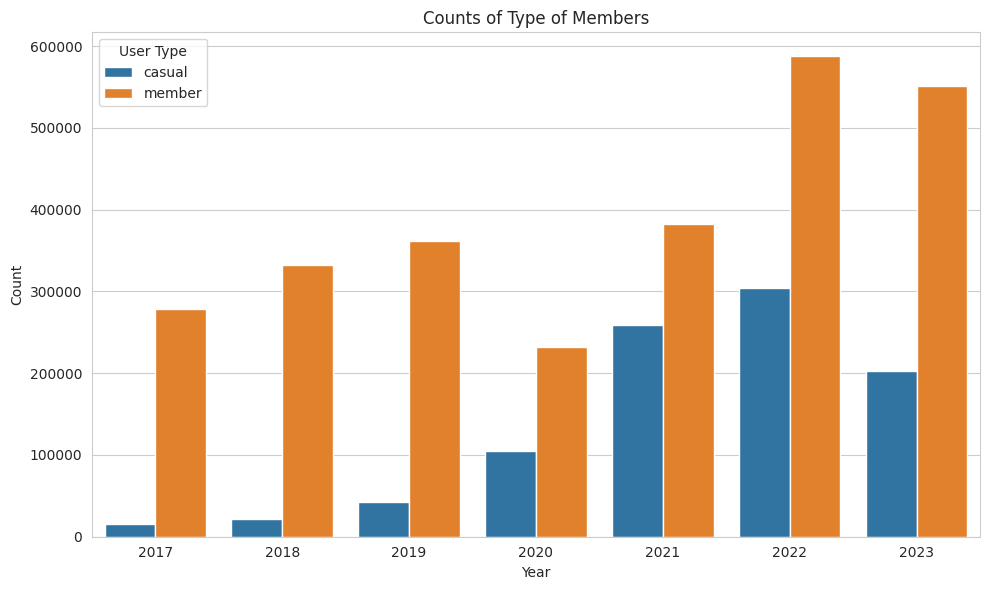

In [ ]:

plot_df=merged_df.copy()
plot_df['start_date'] = pd.to_datetime(plot_df['start_date'])
plot_df['year'] = plot_df['start_date'].dt.year
grouped_df = plot_df.groupby(['year', 'member_casual']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='year', y='count', hue='member_casual')
plt.title('Counts of Type of Members')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


From the chart above, we see that most of the users are members of Citi Bike and the casual users have now been converted to regular users and opted for memberships.

Correlation

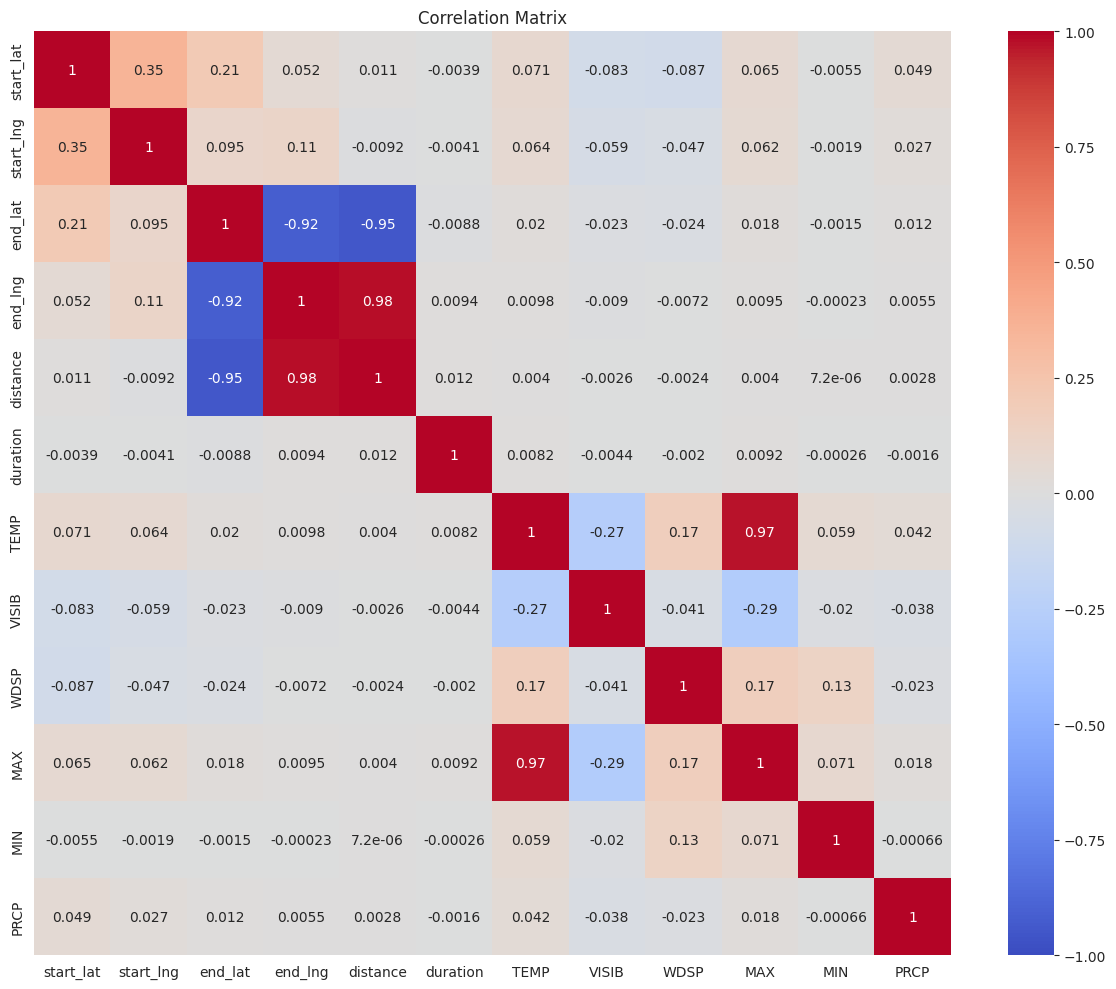

In [ ]:
corr_matrix = merged_df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

**Sparsed/Imbalanced data problems:**

The data that has been viuslaized is of Citi Bikes from 2017 to Dec 2022. There has been revision in data format throughout the duration. That has led to change in format and new stations being added. However, this means there has been limited data for certain data that has been added later.This is always leads to less data( sparce data ) for such stations.

We have more data for denser/central stations which provide better decision on these points. The edge points/edge staions decisions will be based on smaller/limted ride data.

Also, while analysing weather data, certain dates are missing entierly from the database. Except for the year 2020. Hence we imputed the missing values using the data from the year 2020 to fill these missing dates. This data may be out or range and the best fit.